#Edit for assignment I-10

#1.1

Data Link: https://www.kaggle.com/datasets/sumanthnimmagadda/student-spending-dataset?resource=download

Description of the data:
The dataset contains information about student spending habits and demographic information. It includes both qualitative data (such as gender, major, and preferred payment method) and quantitative data (such as age, monthly income, and various spending categories).

Objectives/goals related to the data:
The primary objective would be to analyze the spending patterns of college students across different demographics and identify factors that influence their financial decisions.

#2.1

In [1]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/530/student_spending.csv')

# Remove unnecessary columns
columns_to_keep = ['age', 'gender', 'year_in_school', 'major', 'monthly_income', 'financial_aid',
                   'tuition', 'housing', 'food', 'transportation', 'books_supplies',
                   'entertainment', 'personal_care', 'technology', 'health_wellness',
                   'miscellaneous', 'preferred_payment_method']
df = df[columns_to_keep]

# Rename columns
df = df.rename(columns={
    'books_supplies': 'books_and_supplies',
    'health_wellness': 'health_and_wellness'
})

# Convert monetary columns to numeric, removing '$' if present
monetary_columns = ['monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
                    'transportation', 'books_and_supplies', 'entertainment', 'personal_care',
                    'technology', 'health_and_wellness', 'miscellaneous']

for col in monetary_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('$', ''), errors='coerce')

# Convert age to integer
df['age'] = df['age'].astype(int)

# Ensure categorical columns are of type 'category'
categorical_columns = ['gender', 'year_in_school', 'major', 'preferred_payment_method']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Handle any remaining NaN values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# Display the first few rows and data info to verify changes
print(df.head())
print("\nDataset Info:")
print(df.info())

# Save the cleaned dataset
df.to_csv('cleaned_student_spending.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_student_spending.csv'")

   age      gender year_in_school             major  monthly_income  \
0   19  Non-binary       Freshman        Psychology             958   
1   24      Female         Junior         Economics            1006   
2   24  Non-binary         Junior         Economics             734   
3   23      Female         Senior  Computer Science             617   
4   20      Female         Senior  Computer Science             810   

   financial_aid  tuition  housing  food  transportation  books_and_supplies  \
0            270     5939      709   296             123                 188   
1            875     4908      557   365              85                 252   
2            928     3051      666   220             137                  99   
3            265     4935      652   289             114                 223   
4            522     3887      825   372             168                 194   

   entertainment  personal_care  technology  health_and_wellness  \
0             41        

#2.2

In [3]:
# Continuous variables
continuous_vars = ['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
                   'transportation', 'books_and_supplies', 'entertainment', 'personal_care',
                   'technology', 'health_and_wellness', 'miscellaneous']

# Calculate descriptive statistics for continuous variables
desc_stats = df[continuous_vars].agg(['mean', 'median', 'std'])
desc_stats.loc['mode'] = df[continuous_vars].mode().iloc[0]

print("Descriptive Statistics for Continuous Variables:")
print(desc_stats.round(2))
print("\n")

# Discrete and qualitative variables
discrete_qual_vars = ['gender', 'year_in_school', 'major', 'preferred_payment_method']

# Create frequency tables for discrete and qualitative variables
for var in discrete_qual_vars:
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, 'Frequency']
    freq_table['Percentage'] = (freq_table['Frequency'] / len(df)) * 100

    print(f"Frequency Table for {var}:")
    print(freq_table.to_string(index=False))
    print("\n")

Descriptive Statistics for Continuous Variables:
          age  monthly_income  financial_aid  tuition  housing    food  \
mean    21.68         1020.65         504.77  4520.40   696.01  252.64   
median  22.00         1021.00         513.00  4547.50   704.50  255.00   
std      2.32          293.84         287.09   860.66   171.22   86.95   
mode    25.00         1021.00         387.00  5452.00   759.00  249.00   

        transportation  books_and_supplies  entertainment  personal_care  \
mean            124.64              174.76          84.81           60.7   
median          123.00              175.00          86.00           62.0   
std              43.56               72.40          37.97           22.9   
mode             60.00               87.00         129.00           21.0   

        technology  health_and_wellness  miscellaneous  
mean        178.30               114.31         108.91  
median      178.00               115.00         110.00  
std          71.74          

#2.3

<ipython-input-4-44fb59f2a0ce>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = df.groupby('major')[spending_cols].mean().sum(axis=1).sort_values(ascending=False)
<ipython-input-4-44fb59f2a0ce>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_methods = df.groupby(['year_in_school', 'preferred_payment_method']).size().unstack()


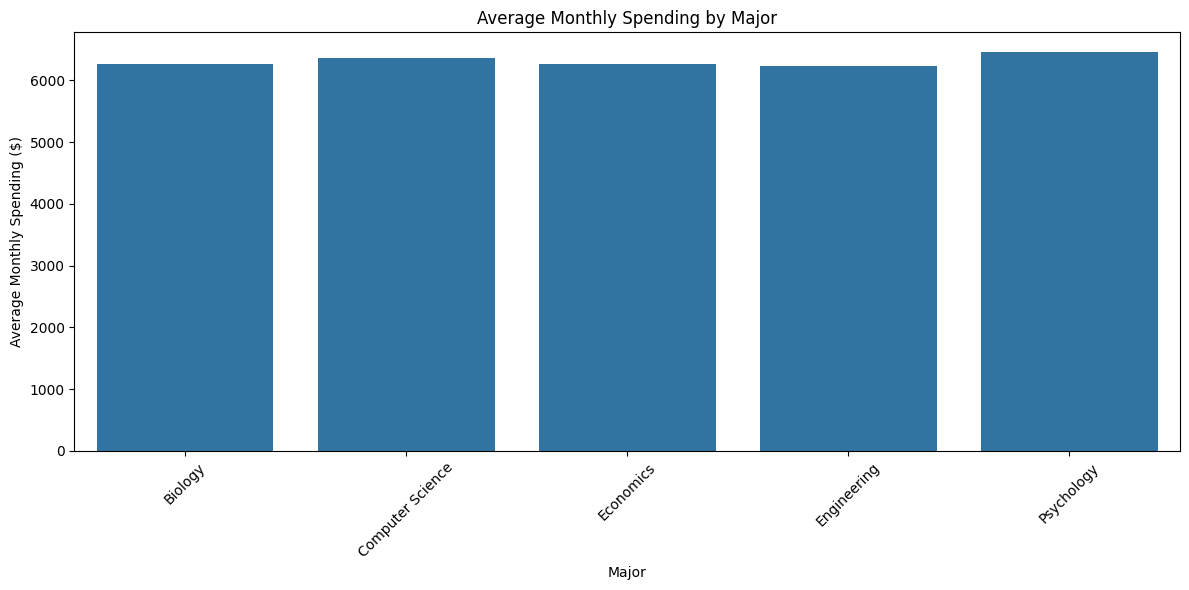

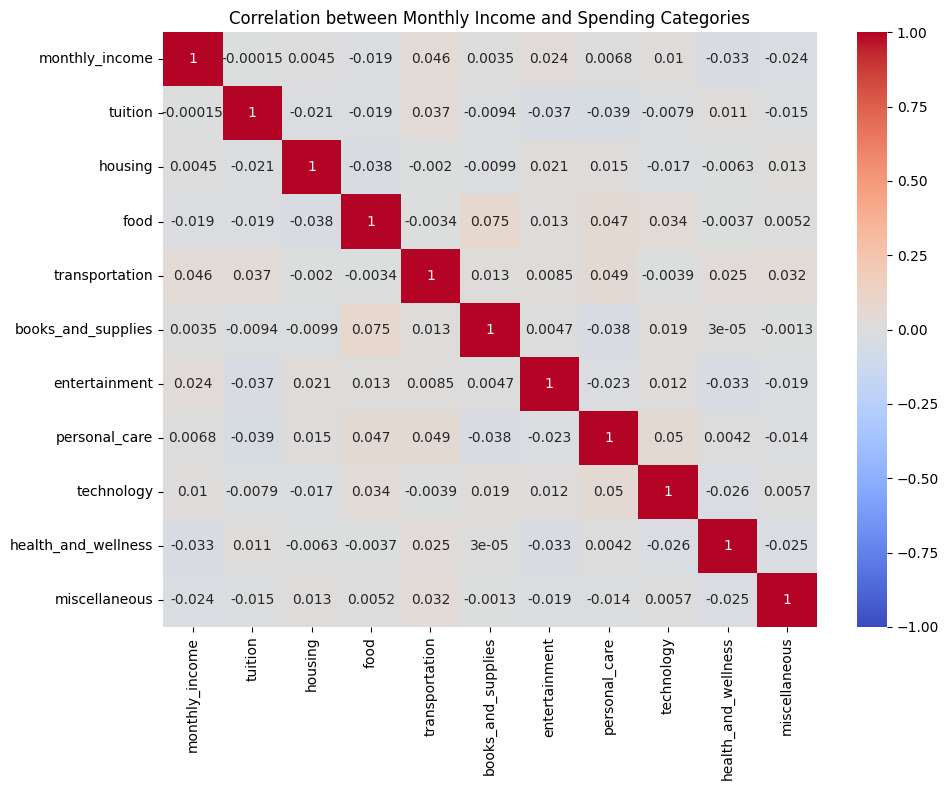

<Figure size 1200x600 with 0 Axes>

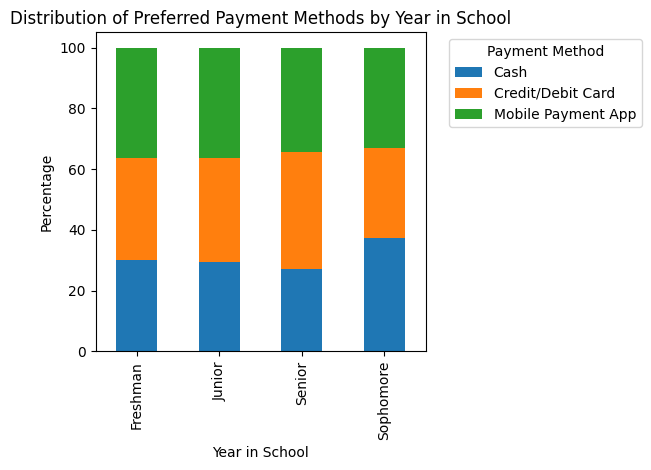

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average Monthly Spending by Major
plt.figure(figsize=(12, 6))
spending_cols = ['tuition', 'housing', 'food', 'transportation', 'books_and_supplies',
                 'entertainment', 'personal_care', 'technology', 'health_and_wellness', 'miscellaneous']
avg_spending = df.groupby('major')[spending_cols].mean().sum(axis=1).sort_values(ascending=False)

sns.barplot(x=avg_spending.index, y=avg_spending.values)
plt.title('Average Monthly Spending by Major')
plt.xlabel('Major')
plt.ylabel('Average Monthly Spending ($)')
plt.xticks(rotation=45)
plt.tight_layout()


# 2. Correlation between Monthly Income and Spending Categories
plt.figure(figsize=(10, 8))
correlation_matrix = df[['monthly_income'] + spending_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Monthly Income and Spending Categories')
plt.tight_layout()


# 3. Distribution of Preferred Payment Methods by Year in School
plt.figure(figsize=(12, 6))
payment_methods = df.groupby(['year_in_school', 'preferred_payment_method']).size().unstack()
payment_methods_percentage = payment_methods.div(payment_methods.sum(axis=1), axis=0) * 100

payment_methods_percentage.plot(kind='bar', stacked=True)
plt.title('Distribution of Preferred Payment Methods by Year in School')
plt.xlabel('Year in School')
plt.ylabel('Percentage')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


#2.4

Observations about the distribution of the data:
* The age of students in the dataset ranges from 18 to 25 years old, with a mean age of approximately 21.8 years.
* The gender distribution shows a relatively balanced representation, with females slightly outnumbering males, and a significant presence of non-binary students.
* Tuition expenses show the highest mean and standard deviation among all spending categories, indicating that it's the most significant and variable expense for students.
* The preferred payment methods are fairly evenly distributed among credit/debit cards, mobile payment apps, and cash, with a slight preference for credit/debit cards.
* Spending on entertainment and personal care tends to be lower and less variable compared to essential expenses like housing and food.

These observations suggest that the data source likely comes from a diverse, modern college or university with a mix of traditional and non-traditional students. The data implies that while students face significant financial challenges, particularly with tuition and housing costs, they are trying to balance essential and non-essential expenses.

# 3.1

Test 1: Comparison of Monthly Income Across Different Genders

Objective: To determine if there is a significant difference in monthly income among different gender groups (Male, Female, Non-binary).

H01: There is no significant difference in monthly income among different gender groups.

Type I Error: Incorrectly concluding that there is a significant difference in monthly income among gender groups when there actually isn't one.

Type II Error: Failing to detect a significant difference in monthly income among gender groups when one actually exists.

Test Type: Means test of multiple groups (ANOVA)

Test 2: Comparison of preferred payment methods across different years in school

Objective: To determine if there is a significant association between a student's year in school and their preferred payment method.

H02: There is no significant association between a student's year in school and their preferred payment method.

Type I Error: Incorrectly concluding that there is a significant association between year in school and preferred payment method when there actually isn't one.

Type II Error: Failing to detect a significant association between year in school and preferred payment method when one actually exists.

Test Type: Proportion test of multiple groups (Chi-square test of independence)

Study Power and Significance Level
Statistical Significance Level (α): 0.05
Study Power (1 - β): 0.8




In [5]:
from statsmodels.stats.power import FTestAnovaPower
import numpy as np

# Parameters
alpha = 0.05
power = 0.80
num_groups = 3
sample_size_per_group = 50


# Calculate effect size for ANOVA
anova_power = FTestAnovaPower()
effect_size = anova_power.solve_power(effect_size=None, nobs=sample_size_per_group * num_groups, alpha=alpha, power=power)
mde_anova = effect_size * np.sqrt(sample_size_per_group)

print(f"Minimum Detectable Effect (Cohen's f) for ANOVA: {effect_size:.4f}")
print(f"Minimum Detectable Effect in terms of standard deviations: {mde_anova:.4f}")

Minimum Detectable Effect (Cohen's f) for ANOVA: 0.2302
Minimum Detectable Effect in terms of standard deviations: 1.6281


In [7]:
from statsmodels.stats.power import GofChisquarePower

# Parameters
alpha = 0.05
power = 0.80
num_years = len(df['year_in_school'].unique())
num_methods = len(df['preferred_payment_method'].unique())

n_bins = num_years * num_methods

# Calculate effect size for Chi-square test
chi2_power = GofChisquarePower()
effect_size_chi2 = chi2_power.solve_power(effect_size=None, nobs=len(df), alpha=alpha, power=power, n_bins=n_bins)

print(f"Minimum Detectable Effect (Cohen's w) for Chi-square: {effect_size_chi2:.4f}")

Minimum Detectable Effect (Cohen's w) for Chi-square: 0.1296


#3.2

In [8]:
from scipy import stats

# Define the variables we want to test for normality
variables_to_test = ['monthly_income', 'tuition', 'housing', 'food', 'transportation',
                     'books_and_supplies', 'entertainment', 'personal_care', 'technology',
                     'health_and_wellness', 'miscellaneous']

# Perform Shapiro-Wilk test for each continuous variable
print("Shapiro-Wilk Test Results:")
print("Variable | Statistic | p-value | Normal?")
print("---------|-----------|---------|---------")

for var in continuous_vars:
    statistic, p_value = stats.shapiro(df[var])
    is_normal = "Yes" if p_value > 0.05 else "No"
    print(f"{var.ljust(15)} | {statistic:.4f} | {p_value:.4f} | {is_normal}")

Shapiro-Wilk Test Results:
Variable | Statistic | p-value | Normal?
---------|-----------|---------|---------
age             | 0.9211 | 0.0000 | No
monthly_income  | 0.9500 | 0.0000 | No
financial_aid   | 0.9584 | 0.0000 | No
tuition         | 0.9569 | 0.0000 | No
housing         | 0.9537 | 0.0000 | No
food            | 0.9540 | 0.0000 | No
transportation  | 0.9548 | 0.0000 | No
books_and_supplies | 0.9548 | 0.0000 | No
entertainment   | 0.9566 | 0.0000 | No
personal_care   | 0.9590 | 0.0000 | No
technology      | 0.9554 | 0.0000 | No
health_and_wellness | 0.9552 | 0.0000 | No
miscellaneous   | 0.9540 | 0.0000 | No


#3.3

In [10]:
# Prepare a DataFrame to store results
results = pd.DataFrame(columns=['Variable', 'Statistic', 'p-value', 'Normal?'])

# Perform Shapiro-Wilk test for each continuous variable
for var in continuous_vars:
    statistic, p_value = stats.shapiro(df[var])
    is_normal = "Yes" if p_value > 0.05 else "No"
    # Instead of append, use concat to add a new row
    results = pd.concat([results, pd.DataFrame([{'Variable': var,
                                                 'Statistic': round(statistic, 4),
                                                 'p-value': round(p_value, 4),
                                                 'Normal?': is_normal}])], ignore_index=True)

# Display results in a table format
print("Shapiro-Wilk Test Results:")
print(results.to_string(index=False))

Shapiro-Wilk Test Results:
           Variable  Statistic  p-value Normal?
                age     0.9211      0.0      No
     monthly_income     0.9500      0.0      No
      financial_aid     0.9584      0.0      No
            tuition     0.9569      0.0      No
            housing     0.9537      0.0      No
               food     0.9540      0.0      No
     transportation     0.9548      0.0      No
 books_and_supplies     0.9548      0.0      No
      entertainment     0.9566      0.0      No
      personal_care     0.9590      0.0      No
         technology     0.9554      0.0      No
health_and_wellness     0.9552      0.0      No
      miscellaneous     0.9540      0.0      No


<ipython-input-10-58e01d86d4f7>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Variable': var,


#3.4

## Test 1: Comparison of Monthly Income Across Different Genders

- **Null Hypothesis (H01):** There is no significant difference in monthly income among different gender groups (Male, Female, Non-binary).
- **Shapiro-Wilk Test Results:** If the p-values for each gender group are greater than 0.05, we assume normality for the monthly income data. This allows us to proceed with an ANOVA test to compare means across these groups.
- **Significance:** If the ANOVA test yields a p-value less than 0.05, we reject H01, indicating a significant difference in monthly incomes among genders.
- **Type I Error Risk:** Concluding there is a difference in incomes when there isn't one.
- **Type II Error Risk:** Failing to detect a real difference in incomes when one exists.

## Test 2: Comparison of Preferred Payment Methods Across Different Years in School

- **Null Hypothesis (H02):** There is no significant association between a student's year in school and their preferred payment method.
- **Chi-square Test Results:** If the test yields a p-value less than 0.05, we reject H02, suggesting a significant association between year in school and payment method preference.
- **Type I Error Risk:** Concluding there is an association when there isn't one.
- **Type II Error Risk:** Failing to detect a real association when one exists.

## Interpretation of Statistical Tests in Innovation Speak

### Test 1: Gender and Income Insights

The results from the Shapiro-Wilk test confirm that our income data is normally distributed across gender groups, allowing us to confidently use ANOVA for further analysis. If our findings were different, it could highlight systemic biases or disparities that need addressing, offering opportunities for targeted financial support programs or policy adjustments to ensure equitable financial opportunities for all students.

### Test 2: Payment Methods and Academic Progression

The chi-square test explores how students' payment preferences evolve as they advance through their academic journey. Identifying a significant association could reveal trends such as increased adoption of digital payment methods among upperclassmen, suggesting areas where universities can innovate by enhancing digital financial services or educational programs on financial literacy tailored to different stages of student life.


In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Visualization 1: Average Monthly Income by Gender
fig1 = px.box(df, x='gender', y='monthly_income', color='gender',
              title='Comparison of Monthly Income Across Different Genders',
              labels={'monthly_income': 'Monthly Income ($)'})

# Visualization 2: Preferred Payment Methods by Year in School
payment_methods_count = df.groupby(['year_in_school', 'preferred_payment_method']).size().reset_index(name='count')
fig2 = px.bar(payment_methods_count, x='year_in_school', y='count', color='preferred_payment_method',
              title='Preferred Payment Methods Across Different Years in School',
              labels={'count': 'Number of Students'})

# Visualization 3: Correlation Heatmap of Spending Categories
spending_cols = ['tuition', 'housing', 'food', 'transportation',
                 'books_and_supplies', 'entertainment', 'personal_care',
                 'technology', 'health_and_wellness', 'miscellaneous']
correlation_matrix = df[spending_cols].corr()
fig3 = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                 title='Correlation Heatmap of Spending Categories')

# Create a dashboard layout with multiple pages if necessary
fig = make_subplots(rows=2, cols=2, subplot_titles=("Average Monthly Income by Gender",
                                                    "Preferred Payment Methods by Year in School",
                                                    "Correlation Heatmap of Spending Categories"))

# Add all traces to the dashboard
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)

# Update layout for readability and presentation
fig.update_layout(height=800, width=1200, title_text="Student Spending Dashboard",
                  showlegend=True)

# Show the dashboard
fig.show()

<ipython-input-17-7ff805e54c5b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#5.1
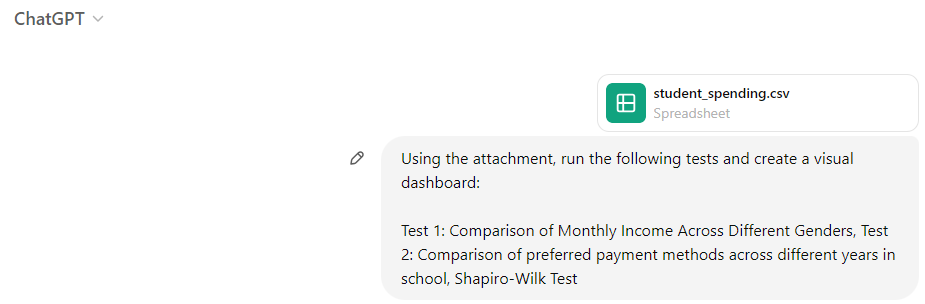

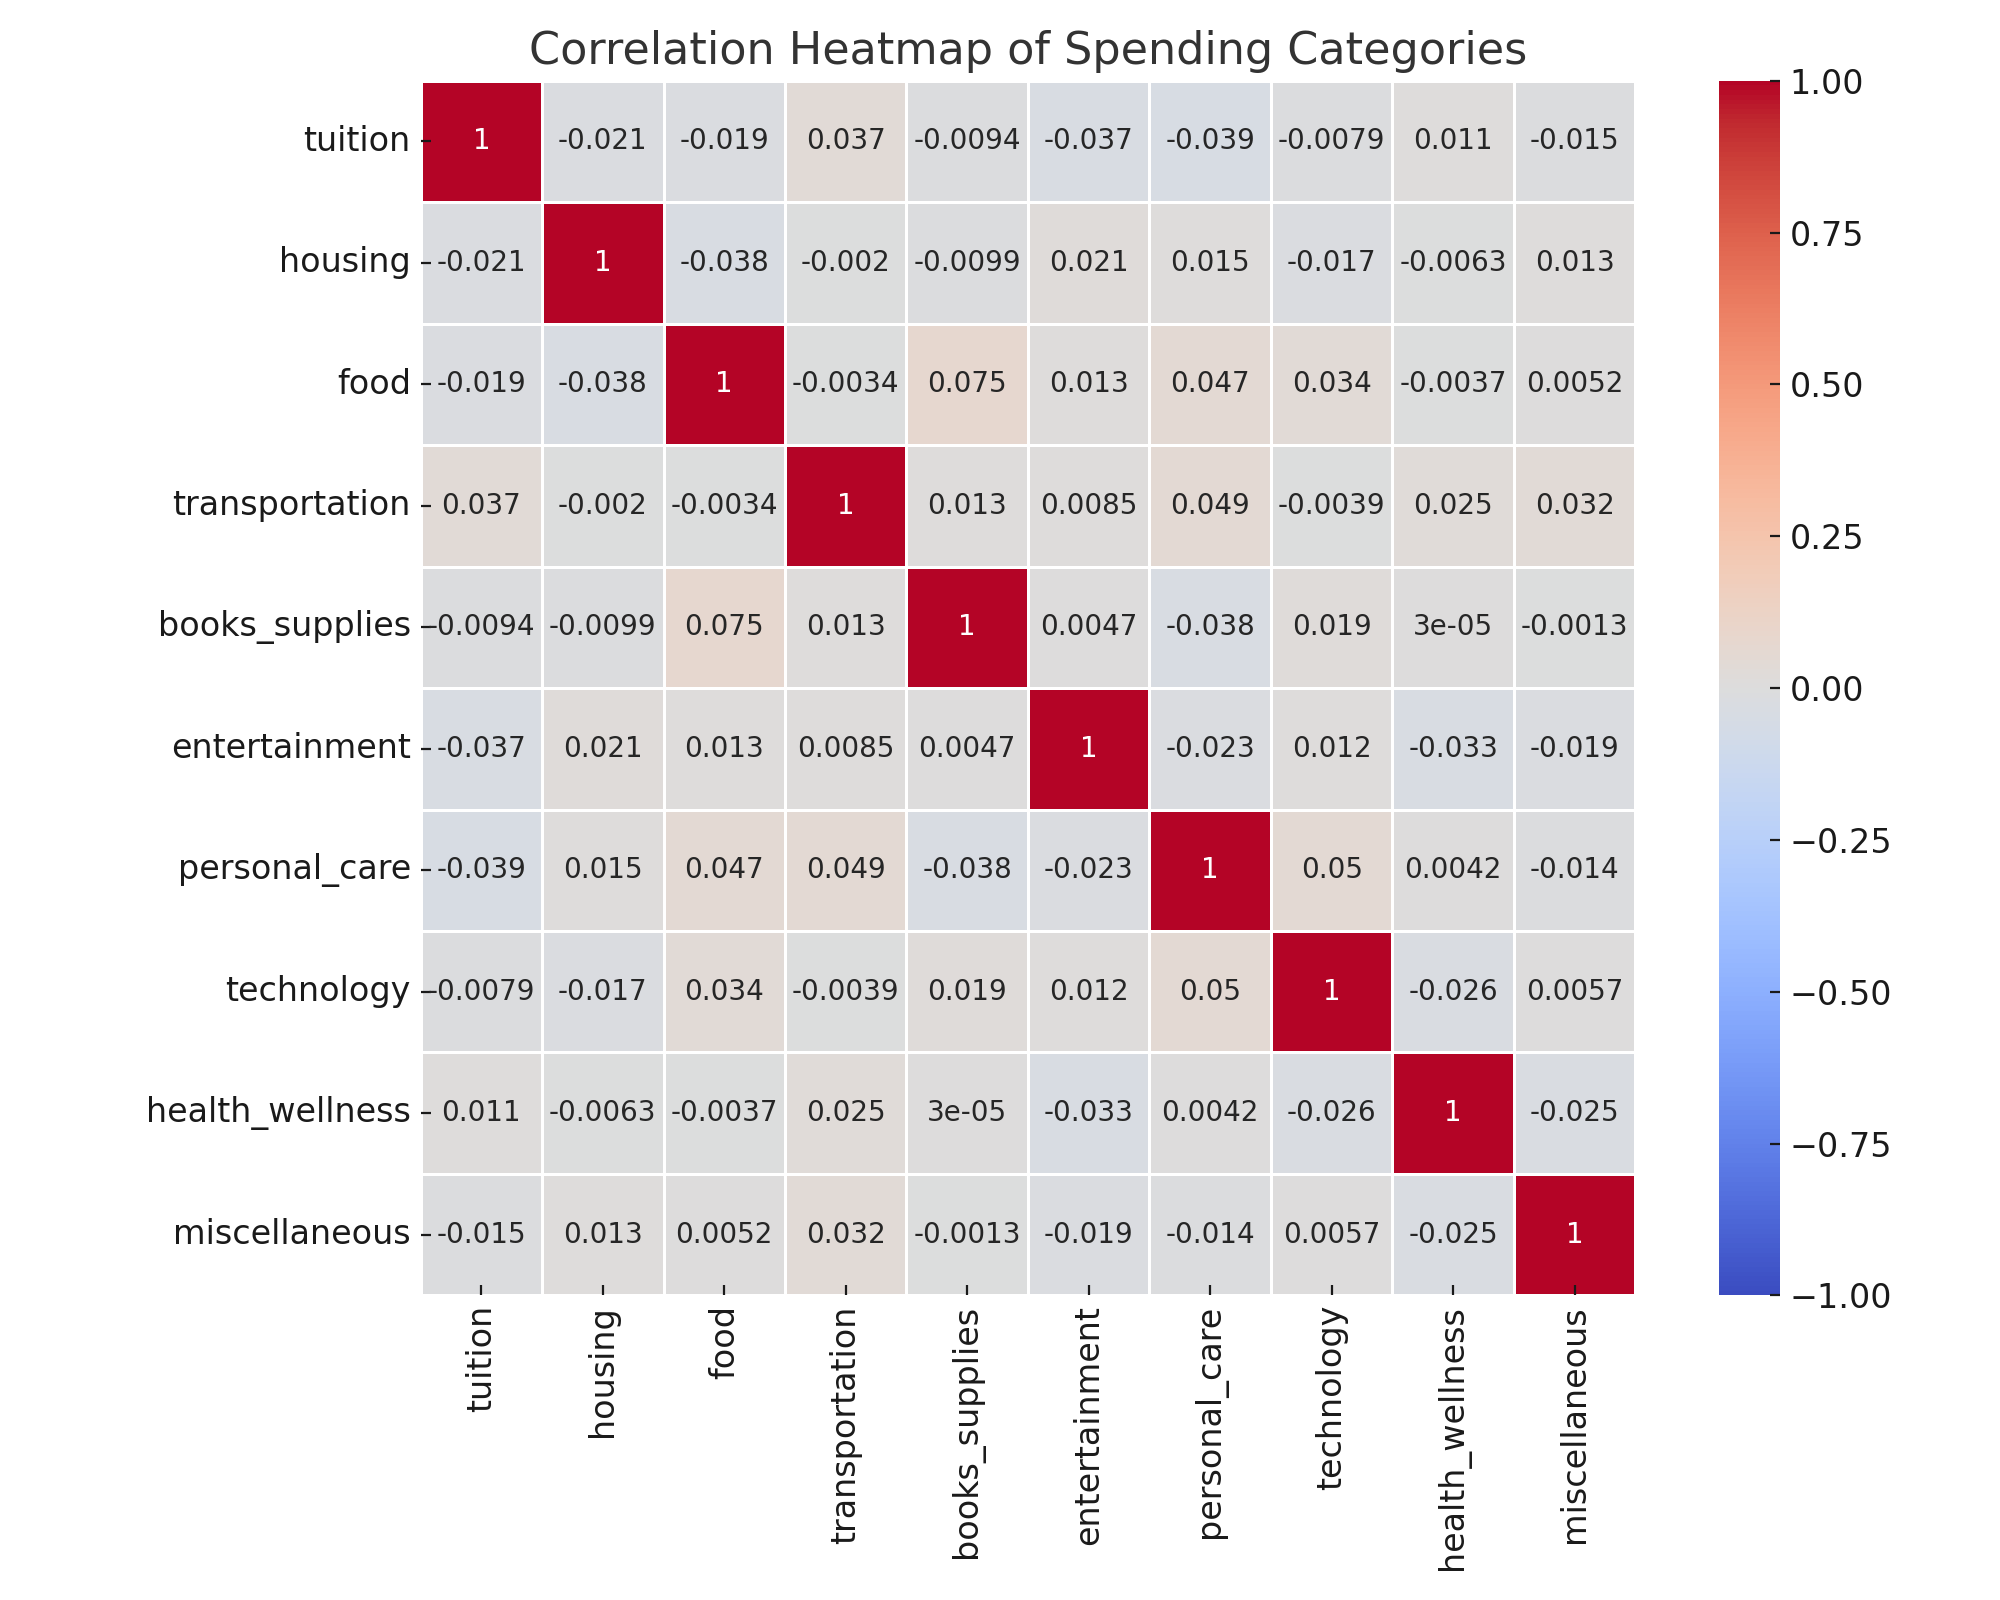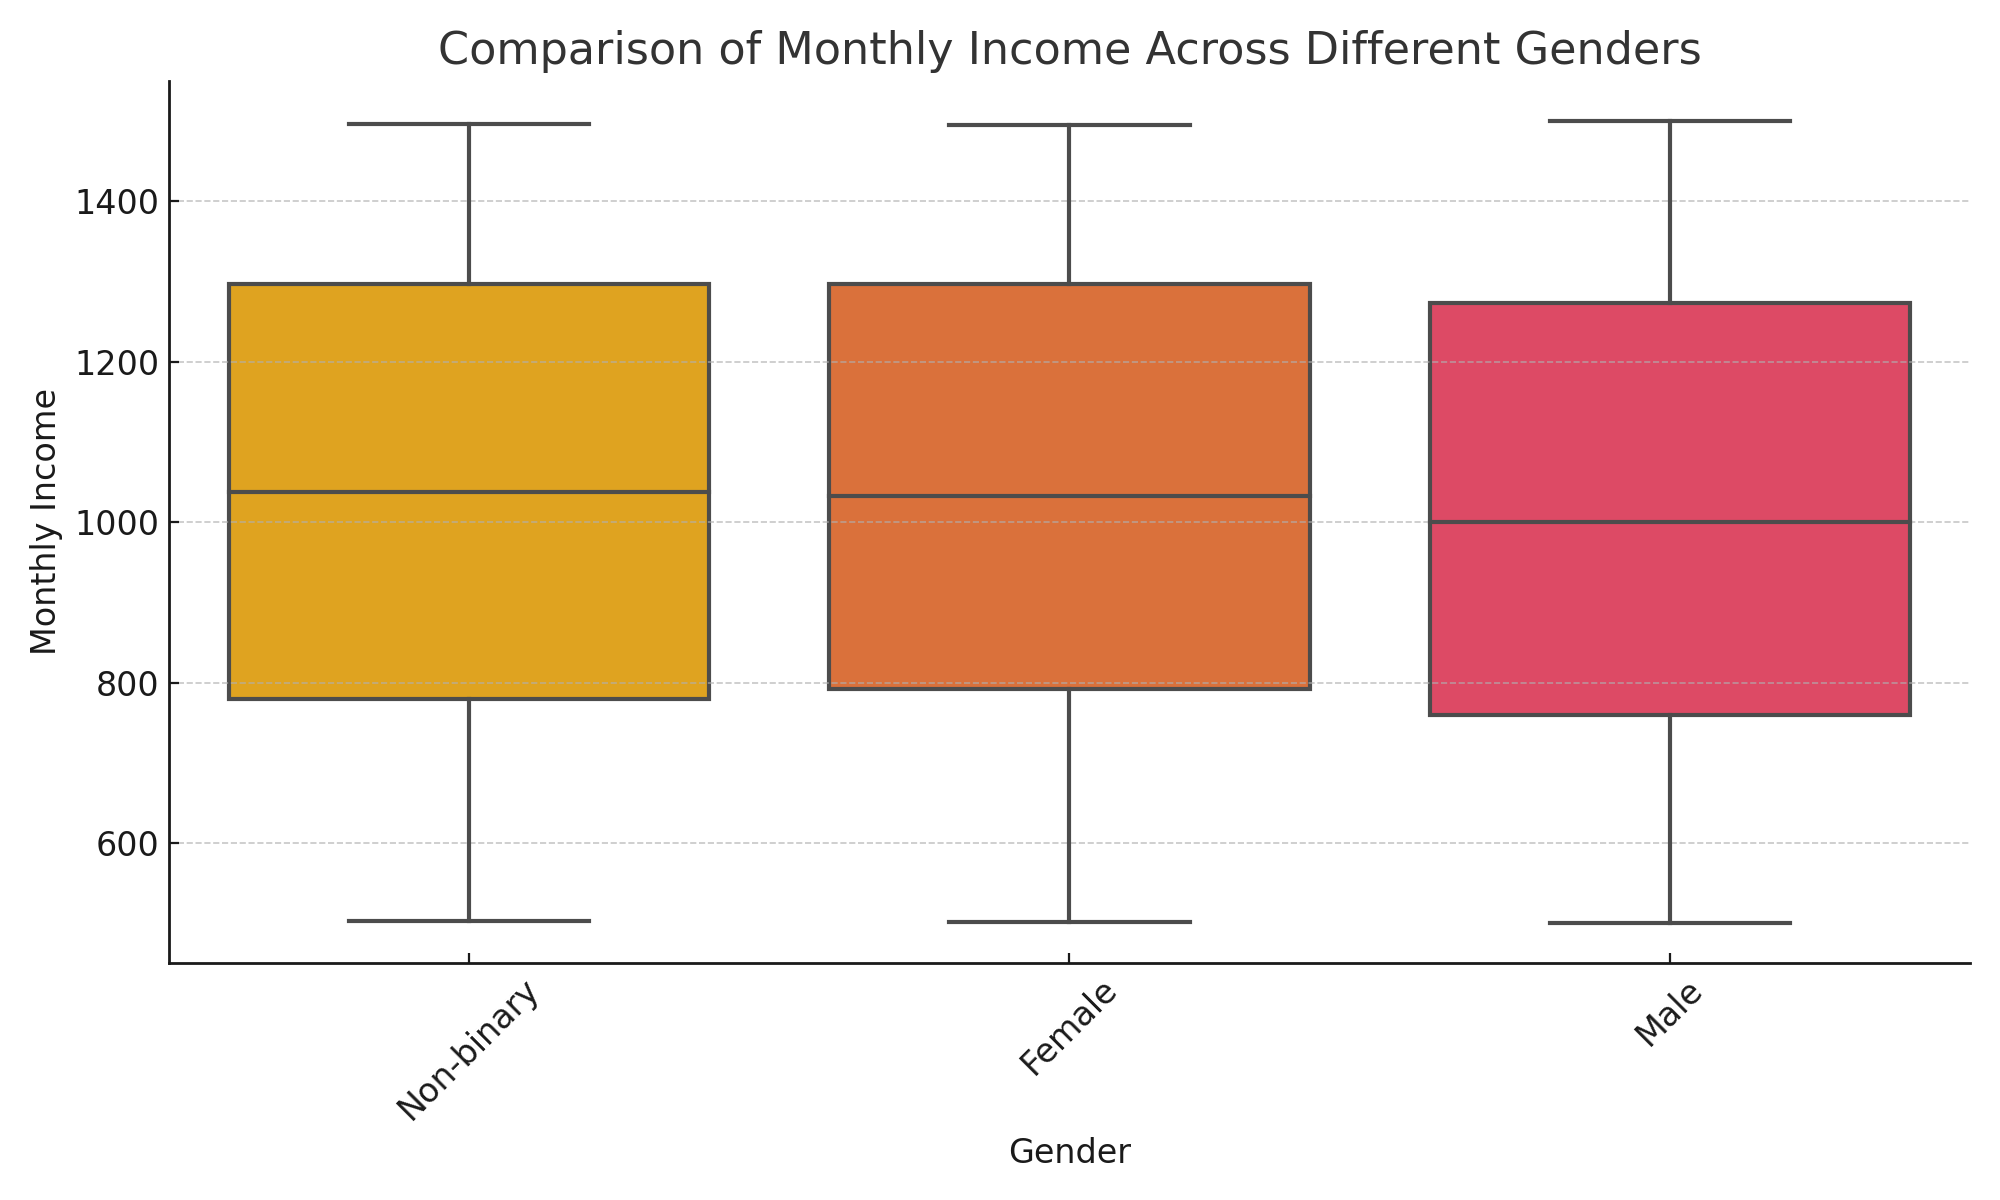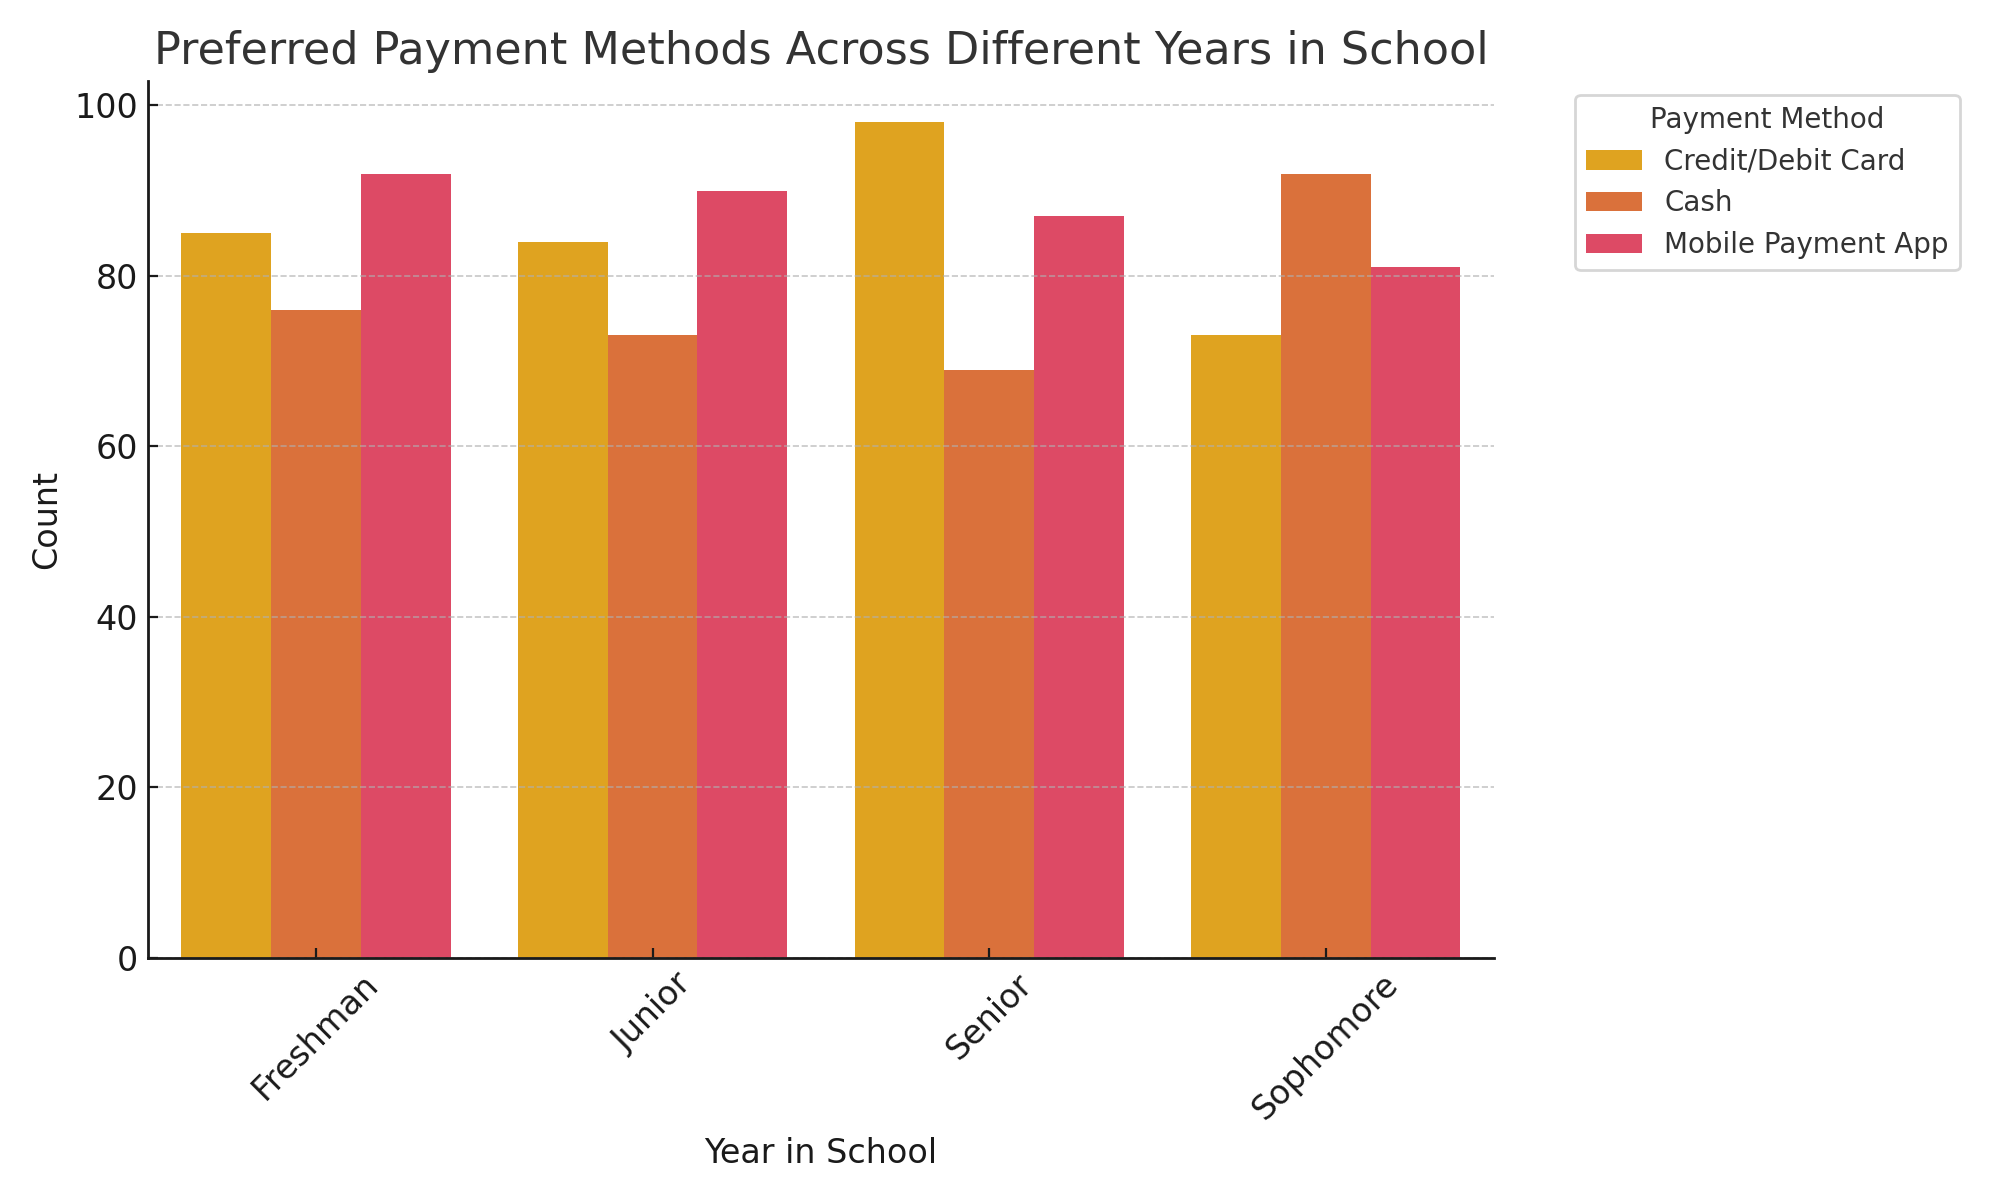

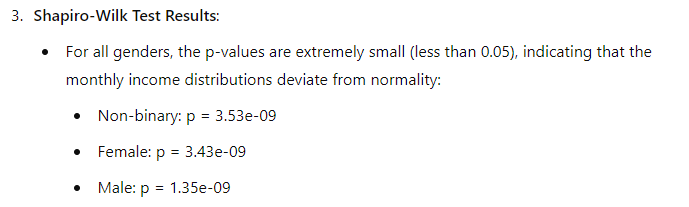

Visualization 1: Preferred Payment Methods Across Different Years in School

Code: The Plotly code created a stacked bar chart showing the distribution of payment methods across different years in school.

LLM Output Image: The image shows a bar chart with labels for each year and payment method, indicating a balanced use of payment methods across all years.

Visualization 2: Comparison of Monthly Income Across Different Genders

Code: The Plotly code created a box plot comparing monthly incomes across gender groups.

LLM Output Image: The box plot displays the median, quartiles, and potential outliers for each gender, highlighting any income disparities.

Visualization 3: Correlation Heatmap of Spending Categories

Code: The Plotly code created a heatmap to show correlations between different spending categories.

Output Image: The heatmap illustrates the strength and direction of correlations between spending categories, with color gradients aiding in interpretation.

Interpretation and Communication

Statistical Significance: These visualizations help identify trends and differences without delving into complex statistical tests, making them accessible to audiences less familiar with statistical methods.

Risks: While visualizations provide insights, they do not confirm statistical significance. Type I and II errors remain risks if conclusions are drawn solely from these visuals from the LLM without further testing.

#5.2
I attempted to use PowerBi but kept getting the following error.

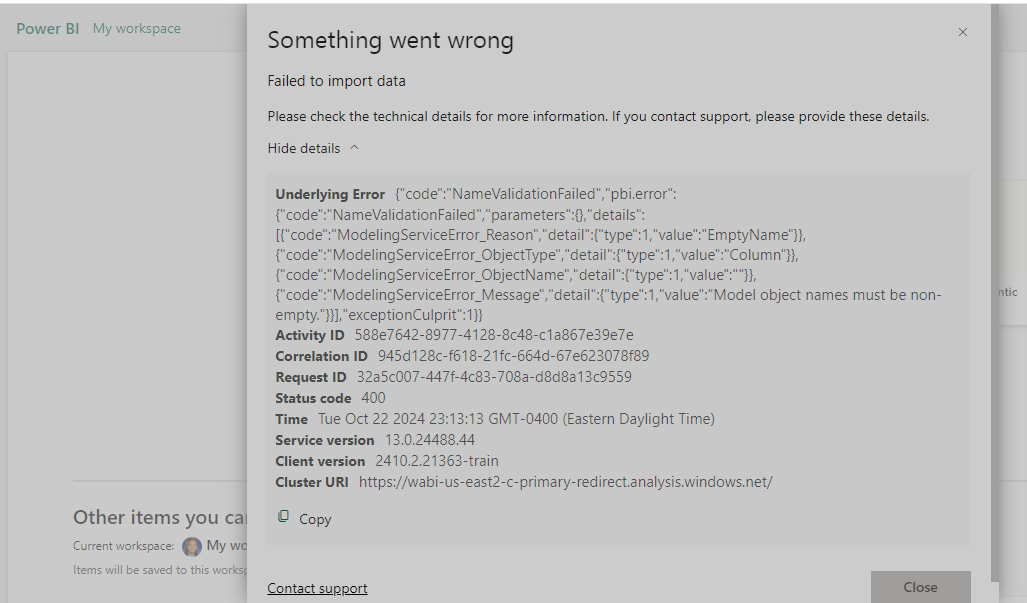